# Product Reviews Sentiment Analysis in Python
Our task is to predict whether the review given is positive or negative.
Steps to be followed:
1)Importing Libraries and Datasets
2)Preprocessing and cleaning the reviews 
3)Analysis of the Dataset
4)Converting text into Vectors
5)Model training, Evaluation, and Prediction

# Importing Libraries and Datasets

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [4]:
#For NLP we will use be using NLTK Library. From that we will be requiring stopword and punkt.
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prans\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Preprocessing and cleaning the reviews 

In [5]:
data = pd.read_csv('AmazonReview.csv')
data.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [6]:
#to drop null values
data.dropna(inplace=True)

In [7]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1


In [8]:
#Now, once the dataset is ready, we will clean the review column by removing the stopwords.
stp_words = stopwords.words('english')

def clean_review(review):
    clean_review = " ".join(word for word in review.split() if word not in stp_words)
    return clean_review

data['Review'] = data['Review'].apply(clean_review)

In [9]:
#Once we have done with the preprocess. Let’s see the top 5 rows to see the improved dataset.
data.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


# Analysis of the Dataset

In [10]:
#Let’s check out that how many counts are there for positive and negative sentiments.
data['Sentiment'].value_counts()


0    15000
1     9999
Name: Sentiment, dtype: int64

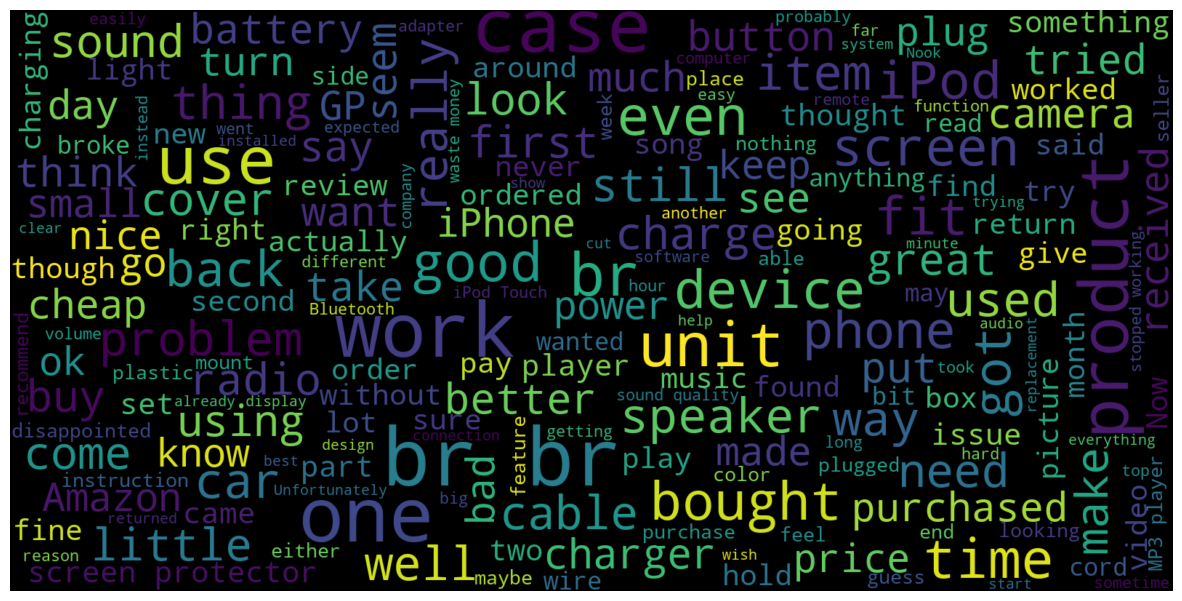

In [11]:
"""To have the better picture of the importance of the words let’s create the Wordcloud of all the 
words with sentiment = 0 i.e. negative"""
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


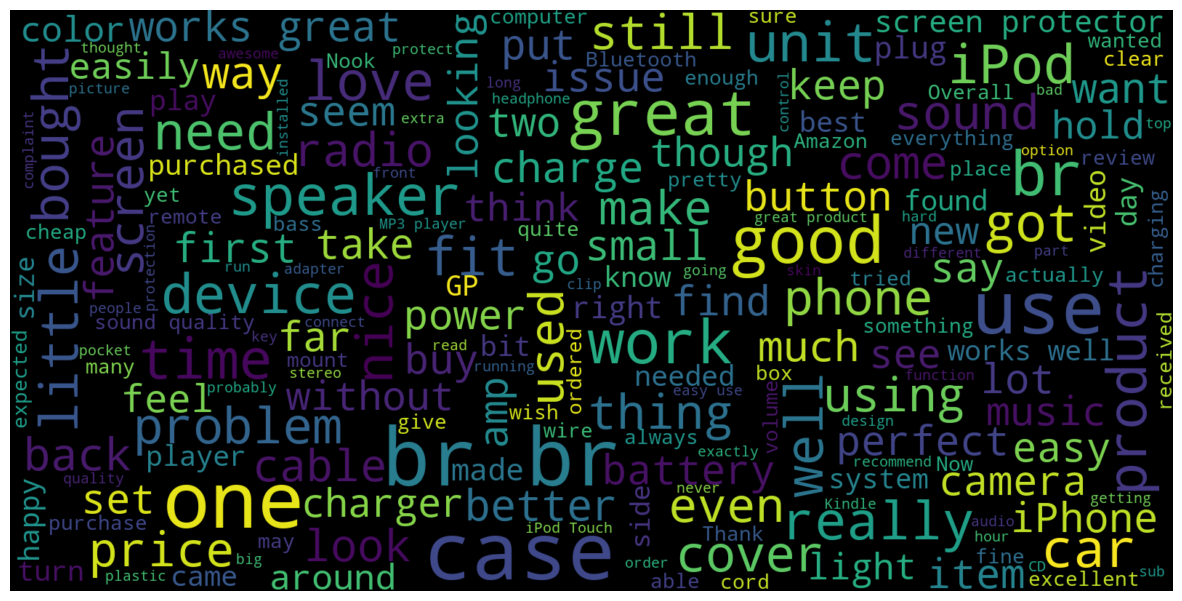

In [12]:
"""Let’s do the same for all the words with sentiment = 1 i.e. positive"""
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()


# Converting text into Vectors 

In [13]:
"""TF-IDF calculates that how relevant a word in a series or corpus is to a text. 
The meaning increases proportionally to the number of times in the text a word appears 
but is compensated by the word frequency in the corpus (data-set)."""
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()


# Model training, Evaluation, and Prediction

In [14]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'], test_size=0.25, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
y_pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,y_pred))


0.81632


In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[3311  407]
 [ 741 1791]]


In [16]:
#testing random reviews
while(True):
    rev = input("Enter a review of the product: ")
    A = cv.transform([rev]).toarray()  # Transform the user input using the fitted vectorizer
    sent = model.predict(A)
    print("\n")
    if int(sent[0]) == 1:
        print("The review indicates positive sentiment.")
    else:
        print("The review indicates negative sentiment.")
    print("\n")
    choice=input("Want to continue(y/n): ")
    if(choice=="n"):
        break
print("\nThanks for using the product review sentiment analyzer")

Enter a review of the product: "The QuantumX Wireless Earbuds are a disappointment. The sound quality is poor, with muddy bass and tinny highs. They're uncomfortable to wear, and the battery life doesn't last long. I regret purchasing them and wouldn't recommend them to anyone."


The review indicates negative sentiment.


Want to continue(y/n): y
Enter a review of the product: "Absolutely love the QuantumX Wireless Earbuds! The sound quality is fantastic, with rich bass and clear highs. They're comfortable to wear for long periods, and the battery life is impressive. Definitely recommend them to anyone looking for high-quality wireless earbuds."


The review indicates positive sentiment.


Want to continue(y/n): n

Thanks for using the product review sentiment analyzer
